# Problem 2: Emergence of the giant component

## a) Analytical approach

In this section we solve the equations for the probability $p$ of a vertex, reached by an edge, does not belong to the giant component:
$$
p = \frac{1-\pi}{1+3\pi} + \frac{4\pi}{1+3\pi} p^3
$$

In [31]:
import numpy as np
from scipy.optimize import fsolve
import sympy
import matplotlib.pyplot as plt

p, pi, gamma = sympy.symbols('p, pi, gamma')

func_edge = 4*pi / (1+3*pi) * p**3 - p + (1-pi)/(1+3*pi)
ps = sympy.solve(func_edge, p)

print("Roots of the equation:")
print(ps)


Roots of the equation:
[1, -(sqrt(pi) - 1)/(2*sqrt(pi)), -(sqrt(pi) + 1)/(2*sqrt(pi))]


We find the following roots in terms of $\pi$:
$$ p_1 = 1 \\
p_2 = -\frac{\sqrt{\pi} - 1}{2\sqrt{\pi}} \\
p_3 = -\frac{\sqrt{\pi} + 1}{2\sqrt{\pi}}
$$

As we can see, $p_1$ is always a root. Here we are concerned only with $p_2$ as it is the only non-trivial root which may be positive for some values of $\pi$.

Next we need to solve the equation for the probability $1-\gamma$ of a vertex not belonging to the giant component:
$$
1 - \gamma = (1-\pi)\left(\frac{1-\pi}{1+3\pi} + \frac{4\pi}{1+3\pi} p^3\right) + \pi\left(\frac{1-\pi}{1+3\pi} + \frac{4\pi}{1+3\pi} p^3\right)^4
$$

In [32]:
p = ps[1]
func_main = (1-pi) *p + pi * p**3 - 1 + gamma

solution = sympy.solve(func_main, gamma)
analytic_sol = sympy.solve(solution)

print("Solution for gamma in terms of pi:")
print(solution)


Solution for gamma in terms of pi:
[(-3*pi**(3/2) + 15*sqrt(pi) + pi - 5)/(8*sqrt(pi))]


Or in a more convenient notation:

$$
\gamma(\pi) = \frac{-3\pi^{3/2} + 15\sqrt{\pi} + \pi -5}{8 \sqrt{\pi}}
$$

In [52]:
print("Roots of the above equation:")
print(analytic_sol)

Roots of the above equation:
[{pi: 1/9}, {pi: 5}]


So the critical value of $\pi$ at which the giant component emerges:
$$
\pi_c = \frac{1}{9}
$$

# b) Numerical results for individual graphs

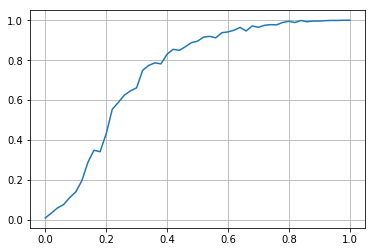

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *

# size of graph
N = 200 # has to be >= 5

sizes = []

# iterations per given pi
times = 10

# number of probability values
num = 51
ps = np.linspace(0,1, num)

for pi in ps:
    size = []
    for iteration in range(times):

        graph = generate(N, pi)
        graph.find_components()
        size.append(graph.largest_component)
    sizes.append(size)
    
sizes = np.asarray(sizes) / N

# c) Comparing analytics and numerics

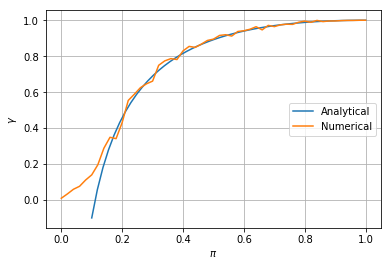

In [50]:
gamma = sympy.lambdify(pi, solution)

num_sol = np.load("component_200.npy")

xx = np.linspace(0.1,1)

plt.figure()
plt.plot(xx, gamma(xx)[0], label="Analytical")
plt.plot(np.linspace(0, 1, len(num_sol)), np.mean(num_sol,1), label="Numerical")
plt.xlabel(r'$\pi$')
plt.legend(loc=5)
plt.ylabel(r'$\gamma$')
plt.grid()
plt.show()

Discuss finite size effects.